In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Part 1 ‐ Exploratory data analysis

In [2]:
login_df= pd.read_json(r"C:\Users\sina\Documents\Springboard\TakeHome\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\logins.json")
display(login_df.head())
print(login_df.info())

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None


In [3]:
login_df.login_time.dt.day_name()

0        Thursday
1        Thursday
2        Thursday
3        Thursday
4        Thursday
           ...   
93137      Monday
93138      Monday
93139      Monday
93140      Monday
93141      Monday
Name: login_time, Length: 93142, dtype: object

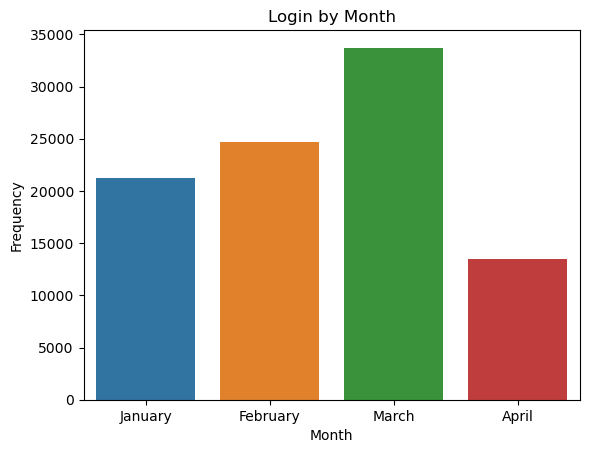

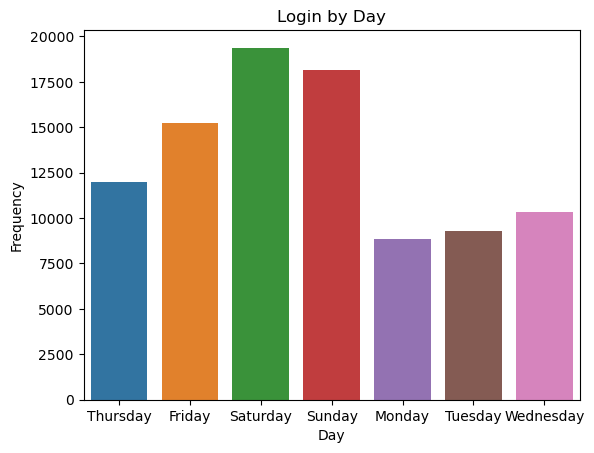

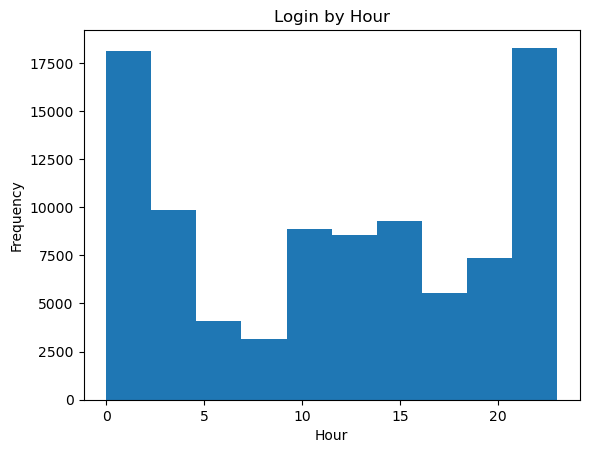

In [4]:
sns.countplot(login_df.login_time.dt.month_name())
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Login by Month')
plt.show()

sns.countplot(login_df.login_time.dt.day_name())
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Login by Day')
plt.show()

login_df.login_time.dt.hour.plot(kind= 'hist')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Login by Hour')
plt.show()

In [5]:
login_df.login_time.dt.date

0        1970-01-01
1        1970-01-01
2        1970-01-01
3        1970-01-01
4        1970-01-01
            ...    
93137    1970-04-13
93138    1970-04-13
93139    1970-04-13
93140    1970-04-13
93141    1970-04-13
Name: login_time, Length: 93142, dtype: object

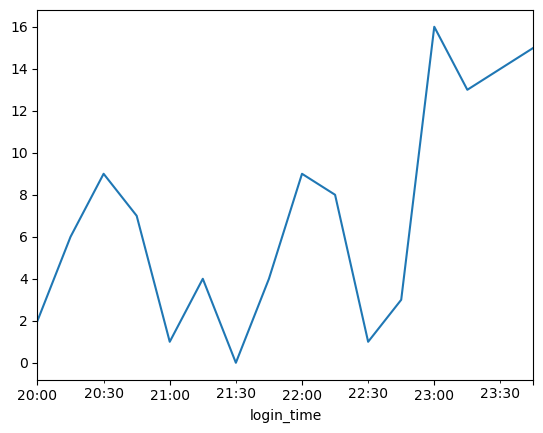

In [6]:
login_df.loc[login_df.login_time.dt.date == pd.to_datetime("1970-01-01").date()].set_index('login_time').resample('15T').size().plot()
plt.show()

**The login is higher in March, during the weekend, and at night time, after 22:45.**

## Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment\
b) what statistical test(s) you will conduct to verify the significance of the observation\
c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

**1) Significant increase in the average number of daily intercity trips. I chose this metric as it clearly shows whether the experiment has been successful to encourage partner drivers to drive more between the two cities and also indicates whether the toll was the main reason for the low number of trips.**

**2) We can conduct a hypothesis test with the following null and alternative hypothesese:**\
**H0: N2<=N1**\
**H1: N2> N1**\
**where N1 and N2 are the number of inter-city trips before and after the experiment.
we can use the t-statistic along with the p-value to decide whether the experiment has been successful.**

**Noamlity assumption, low-sample size, and random sampling requirement are the main caveats of this statistical test.**

In [7]:
plt.style.use('ggplot')

## Part 3 - Predictive Modeling

We have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.


1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice)

In [8]:
ultimate_df= pd.read_json(r"C:\Users\sina\Documents\Springboard\TakeHome\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\ultimate_data_challenge.json")

In [9]:
display(ultimate_df.head())
print(ultimate_df.info())

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None


### 1) Initial Data Cleaning

#### 1.1) Changing the data types

In [10]:
ultimate_df['signup_date']= pd.to_datetime(ultimate_df.signup_date)
ultimate_df['last_trip_date']= pd.to_datetime(ultimate_df.last_trip_date)

#### 1.2) Missing values

In [11]:
print(ultimate_df.isna().sum(), '\n')
print(ultimate_df.isna().mean().round(4)*100)

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64 

city                       0.00
trips_in_first_30_days     0.00
signup_date                0.00
avg_rating_of_driver      16.24
avg_surge                  0.00
last_trip_date             0.00
phone                      0.79
surge_pct                  0.00
ultimate_black_user        0.00
weekday_pct                0.00
avg_dist                   0.00
avg_rating_by_driver       0.40
dtype: float64


In [12]:
df_num= ultimate_df.select_dtypes(np.number)
df_cat= ultimate_df.select_dtypes('object')
df_date= ultimate_df[['signup_date', 'last_trip_date']]

In [13]:
# a) Fill the numerical variables with the median
df_num_imp= df_num.apply(lambda x: x.fillna(x.median()), axis=1)

# b) Fill the categorical variables with the most frequest
mode= ultimate_df.phone.mode()
df_cat_imp= df_cat.fillna(mode[0])
 
ultimate_df= pd.concat([pd.concat([df_num_imp, df_cat_imp], axis= 1), df_date], axis=1)

ultimate_df.isna().sum()

trips_in_first_30_days    0
avg_rating_of_driver      0
avg_surge                 0
surge_pct                 0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
city                      0
phone                     0
signup_date               0
last_trip_date            0
dtype: int64

### Numerical Variables

In [14]:
print(df_num.columns)

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'],
      dtype='object')


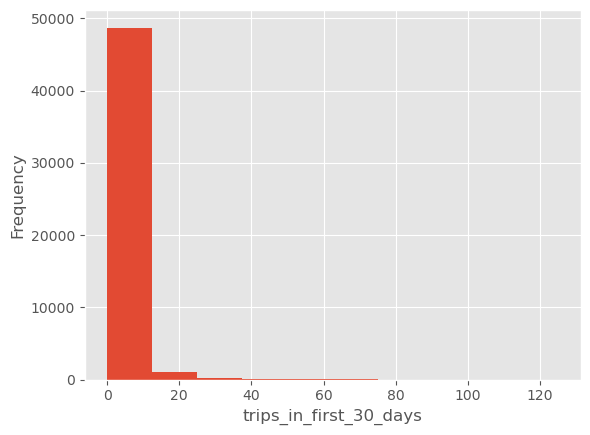

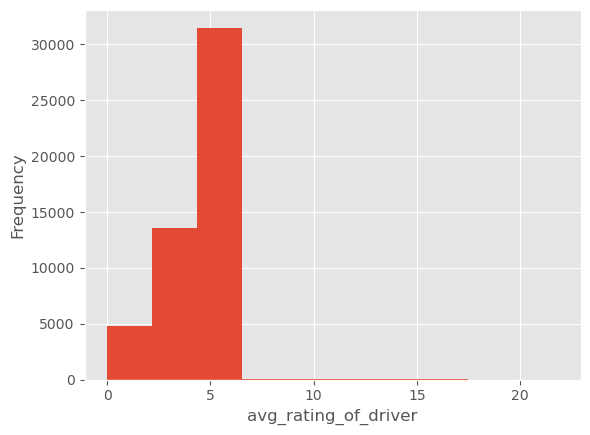

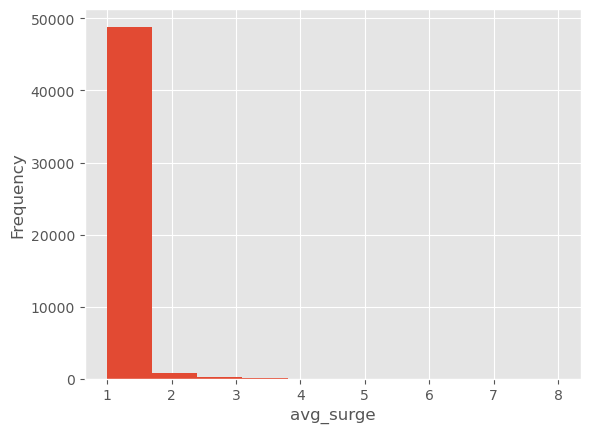

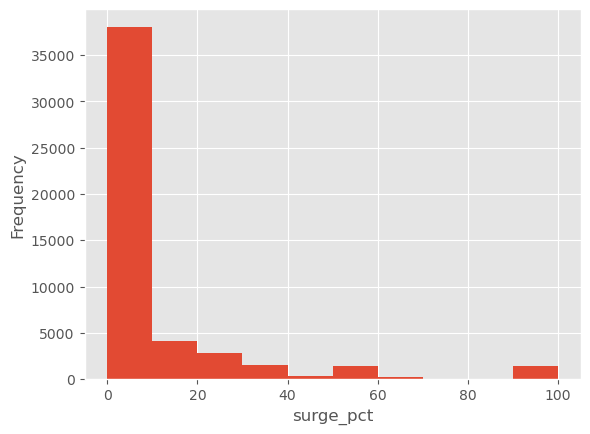

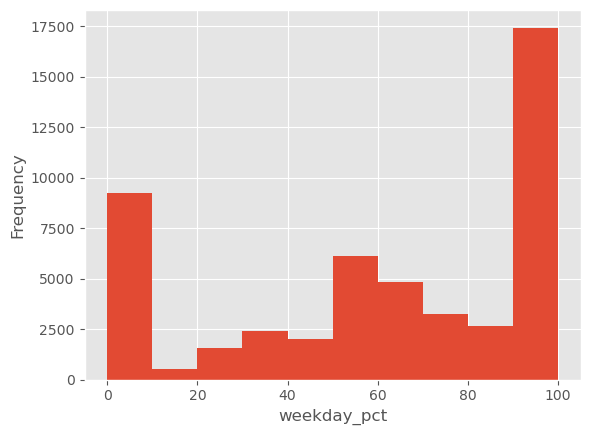

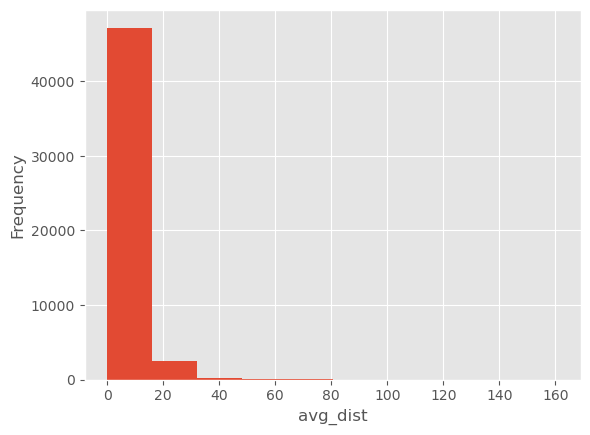

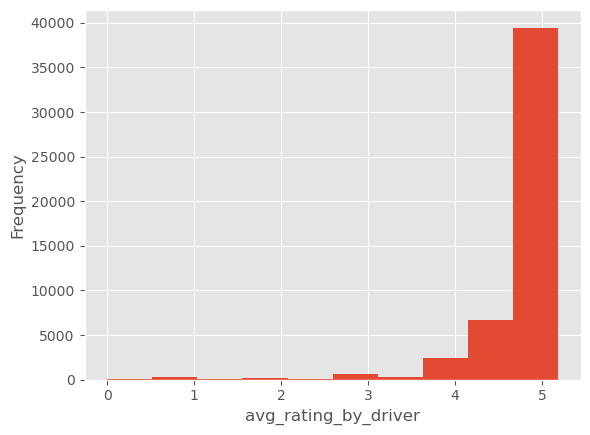

In [15]:
for var in df_num.columns:
    ultimate_df[var].plot(kind= 'hist')
    plt.xlabel(var)
    plt.show()

#### Correlation between the numerical variables

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,1.000000,-0.011302,-0.001841,0.005720,0.050388,-0.136329,-0.039115
avg_rating_of_driver,-0.011302,1.000000,-0.026189,-0.003899,0.014630,0.034509,0.123175
avg_surge,-0.001841,-0.026189,1.000000,0.793582,-0.110071,-0.081491,0.010597
surge_pct,0.005720,-0.003899,0.793582,1.000000,-0.144918,-0.104414,0.020103
weekday_pct,0.050388,0.014630,-0.110071,-0.144918,1.000000,0.101652,0.020442
avg_dist,-0.136329,0.034509,-0.081491,-0.104414,0.101652,1.000000,0.080540
avg_rating_by_driver,-0.039115,0.123175,0.010597,0.020103,0.020442,0.080540,1.000000


<AxesSubplot:>

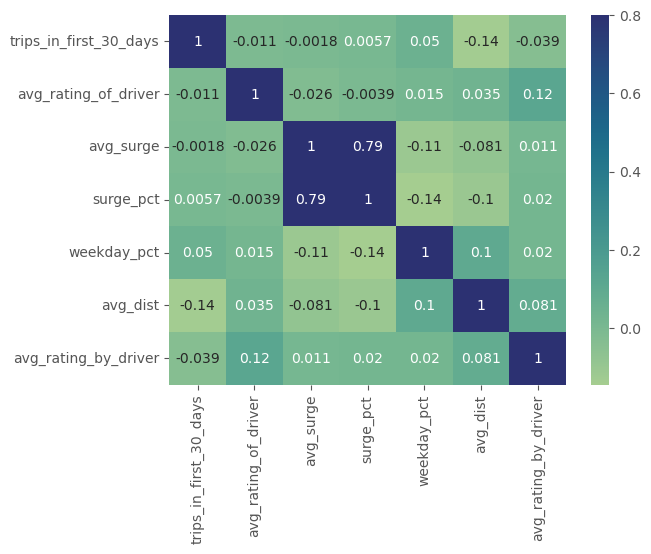

In [16]:
num_cor=df_num.corr()
display(num_cor)

sns.heatmap(num_cor, annot=True, cmap='crest', vmax=0.8)

# The only significant correlation is between avg_surge and surge_pct

### Categorical Variables

In [17]:
df_cat.head()

,city,phone
0,King's Landing,iPhone
1,Astapor,Android
2,Astapor,iPhone
3,King's Landing,iPhone
4,Winterfell,Android


Winterfell        0.46672
Astapor           0.33068
King's Landing    0.20260
Name: city, dtype: float64


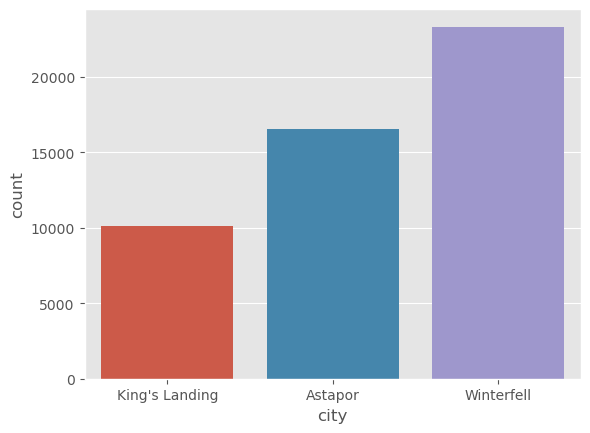

In [18]:
# 1) city
print(ultimate_df.city.value_counts(normalize= True))
sns.countplot('city', data=ultimate_df)
plt.show()

iPhone     0.69956
Android    0.30044
Name: phone, dtype: float64


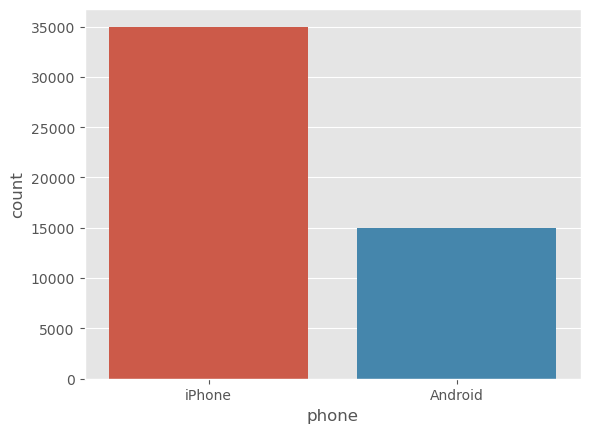

In [19]:
# 2) phone
print(ultimate_df.phone.value_counts(normalize= True))
sns.countplot('phone', data= ultimate_df)
plt.show()

2014-01-01 00:00:00 2014-01-31 00:00:00


<AxesSubplot:>

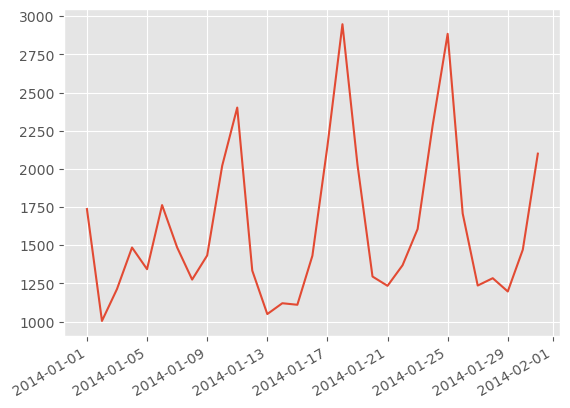

In [20]:
print(ultimate_df.signup_date.min(), ultimate_df.signup_date.max())
# It's for the month of Januery 2014

ultimate_df.signup_date.value_counts().plot()

2014-01-01 00:00:00 2014-07-01 00:00:00


<AxesSubplot:>

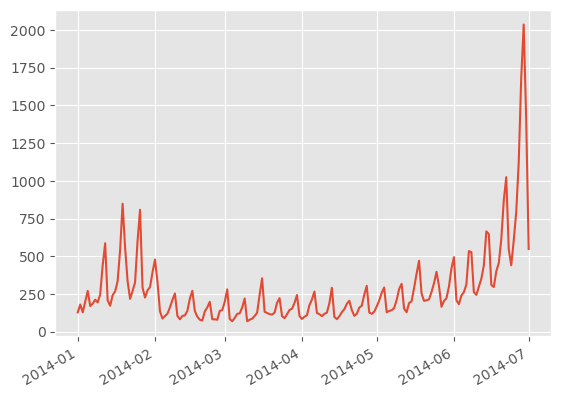

In [21]:
print(ultimate_df.last_trip_date.min(), ultimate_df.last_trip_date.max())

ultimate_df.last_trip_date.value_counts().plot()

# Shows that there are still a large amount of loyal customers who made their last trip recently!

### Coverting Categorical Variables

In [22]:
# phone is a binary categorical variable
# city has three categories

ultimate_df['iPhone']= np.where(ultimate_df.phone=='iPhone', 1, 0)

ultimate_df= pd.get_dummies(ultimate_df, columns=['city'])

display(ultimate_df.head())

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,phone,signup_date,last_trip_date,iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,4.0,4.7,1.10,15.4,46.2,3.67,5.0,iPhone,2014-01-25,2014-06-17,1,0,1,0
1,0.0,5.0,1.00,0.0,50.0,8.26,5.0,Android,2014-01-29,2014-05-05,0,1,0,0
2,3.0,4.3,1.00,0.0,100.0,0.77,5.0,iPhone,2014-01-06,2014-01-07,1,1,0,0
3,9.0,4.6,1.14,20.0,80.0,2.36,4.9,iPhone,2014-01-10,2014-06-29,1,0,1,0
4,14.0,4.4,1.19,11.8,82.4,3.13,4.9,Android,2014-01-27,2014-03-15,0,0,0,1


### Creating the response variable

The last day is July 1, 2014. Therefore, the riders are considered as retained or active if their last trip was between June 1 and July 1, 2014. 

In [23]:
ultimate_df['active']= np.where(ultimate_df.last_trip_date>= '2014-06-01', 1, 0)
ultimate_df['active'].value_counts(normalize= True)

0    0.62392
1    0.37608
Name: active, dtype: float64

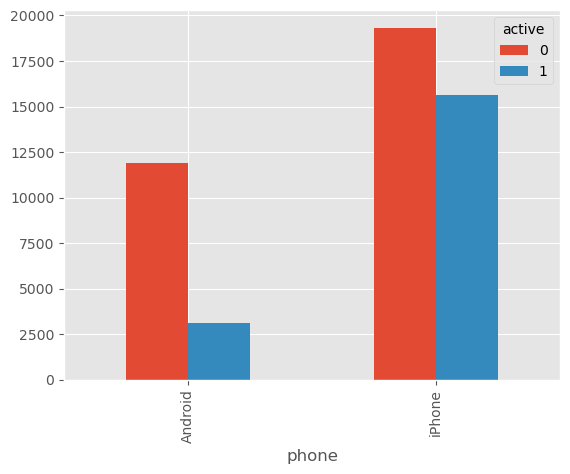

In [24]:
pd.pivot_table(data= ultimate_df, columns= 'active', index= 'phone', aggfunc= 'size').plot(kind= 'bar')
plt.show()

# There are more active Andriod users

## Modeling

In [25]:
print(ultimate_df.columns)

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'phone',
       'signup_date', 'last_trip_date', 'iPhone', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'active'],
      dtype='object')


In [26]:
selected_features= ["trips_in_first_30_days", "avg_rating_of_driver", "avg_surge",
       "surge_pct", "weekday_pct", "avg_dist", "avg_rating_by_driver", "iPhone", "city_Astapor",
       "city_King's Landing", "city_Winterfell"]

X= ultimate_df[selected_features]
y= ultimate_df['active']

#### train-test split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 123)

print(X_train.shape, X_test.shape)

(40000, 11) (10000, 11)


### Logistic Regression

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [30]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [32]:
ss= StandardScaler()
X_train_scaled= ss.fit_transform(X_train)
X_test_scaled= ss.transform(X_test)

param_lr = {
 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

lr= LogisticRegression()


model_grid= GridSearchCV(estimator= lr, 
                        param_grid= param_lr, 
                        scoring= 'roc_auc', 
                        cv= 5)


model_grid.fit(X_train_scaled, y_train)
y_pred= model_grid.predict(X_test_scaled)
y_pred_prob= model_grid.predict_proba(X_test_scaled)[:,1]

print(f"The accuracy of the model is {accuracy_score(y_test, y_pred)}")
print(f"The AUC score is {roc_auc_score(y_test, y_pred_prob)}")

The accuracy of the model is 0.7065
The AUC score is 0.7423171949742811


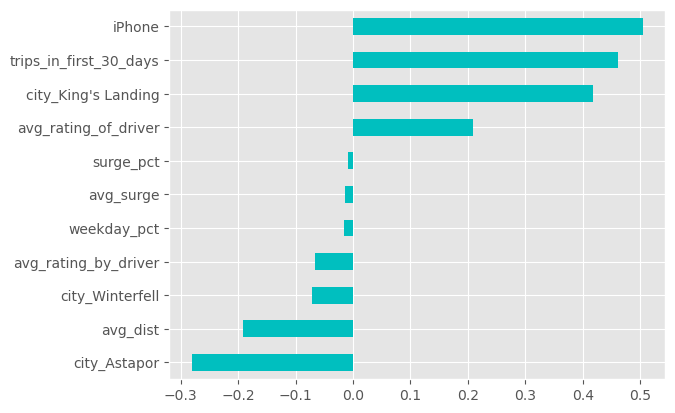

In [33]:
best_lr= model_grid.best_estimator_
pd.Series(best_lr.coef_.flatten(), index= X.columns).sort_values().plot(kind= 'barh', color= 'c')
plt.show()

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
param_rf = {
 'criterion':['gini','entropy'],
 'max_features':['auto','log2',0.2,None],
 'min_samples_leaf':[40,50,60]
}

model_grid= GridSearchCV(estimator= RandomForestClassifier(), 
                        param_grid= param_rf, 
                        scoring= 'roc_auc', 
                        n_jobs=2, 
                        cv=5)
model_grid.fit(X_train, y_train)

y_pred= model_grid.predict(X_test)
y_pred_prob= model_grid.predict_proba(X_test)[:,1]

print(f"The accuracy of the model is {accuracy_score(y_test, y_pred)}")
print(f"The AUC score is {roc_auc_score(y_test, y_pred_prob)}")

The accuracy of the model is 0.7769
The AUC score is 0.8432559155546945


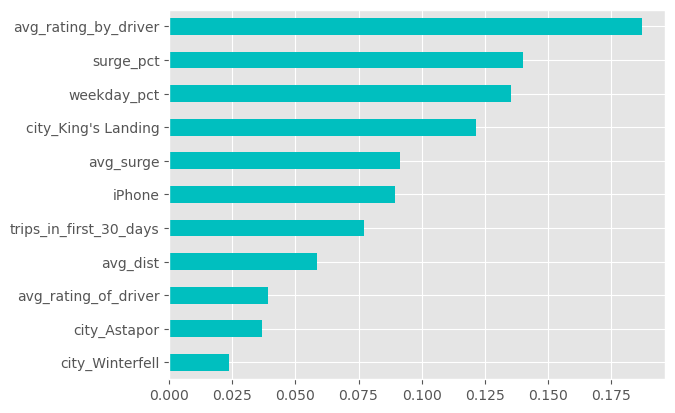

In [36]:
best_rf= model_grid.best_estimator_
pd.Series(best_rf.feature_importances_, index= X.columns).sort_values(ascending= True).plot(kind= 'barh', color= 'c')
plt.show()

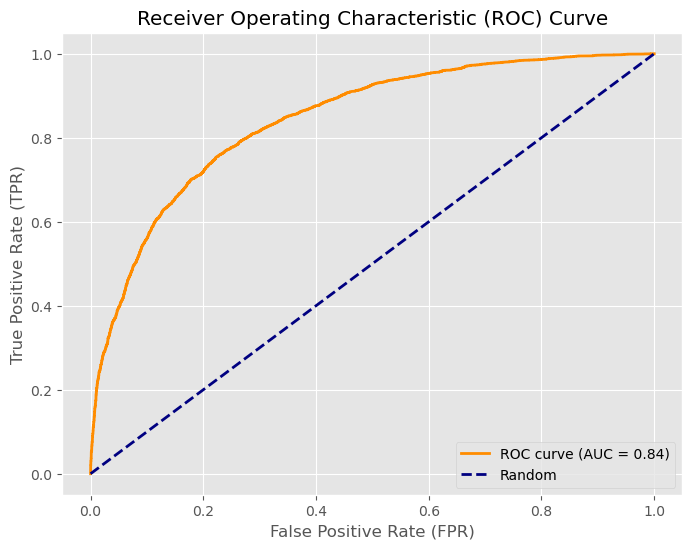

In [37]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Logistic regression was selected as we have a binary classification problem and as it is only capable of identifying the linear relationships, it was used as the base model for comparison. 

Random forest was selected for it's flexibility and it's robustness to overfitting.

The top 3 important variable based on the random forest model are:
* average rating by driver
* weekday percentage
* surge percentage

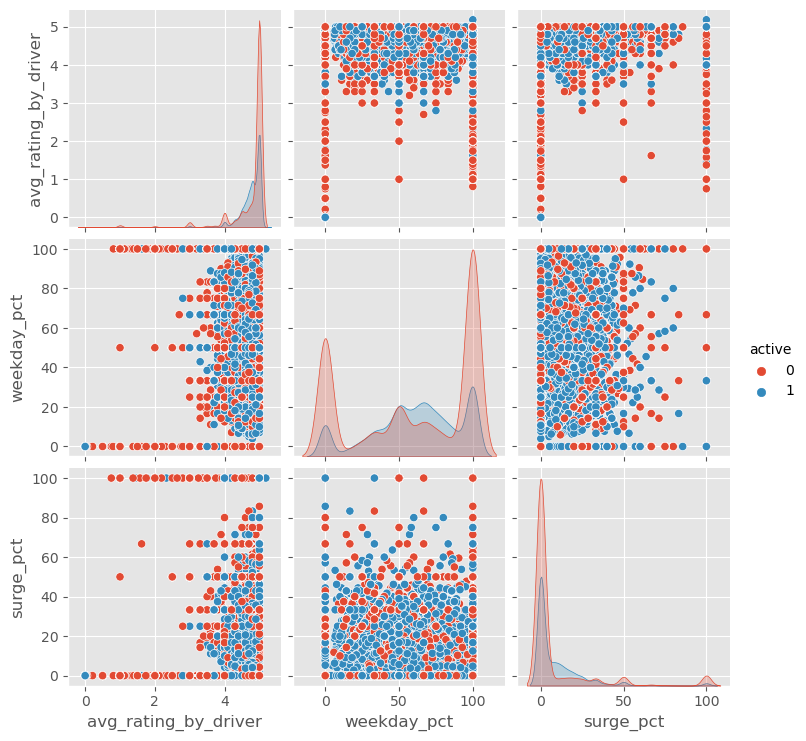

In [38]:
sns.pairplot(ultimate_df[['avg_rating_by_driver', 'weekday_pct', 'surge_pct', 'active']], hue= 'active')

Examining the data reveals that a significant proportion of weekday trips, both very high and very low percentages, contribute to inactivity. A similar pattern emerges when considering the percentage of trips with surge multipliers. Additionally, we observe that there riders with an average rating falling between 4 and 5 are more likely to stay active.